In [ ]:
import os
import sys

In [ ]:
%load_ext autoreload
#Now, you can turn on auto-reloading
%autoreload 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/Colab_Notebooks/cs3220_A3/A3_p1/src' #@param {type: "string"}
sys.path.append(path)

In [5]:
%matplotlib inline

**Problem-Solving Agents**

When the correct action to take is not immediately obvious, an agent may need to to *plan ahead*: to consider a *sequence of actions* that form a *path* to a *goal state*.

Such an agent is called a ***problem-solving agent***, and the computational process it undertakes is called ***search***.


Problem-solving agents use *atomic representations* - states of the world are considered as wholes, with no internal structure visible to the
problem-solving algorithms


We are going to duild the **goal-based agents** that can plan ahead to solve problems.

In particular, we examine *navigation problem*/ *route finding problem*.

We must begin by precisely **defining problems**

We consider only the simplest environments: single agent, fully observable, deterministic, static, discrete, and known

*class Problem* - how we define a Problem in general

**The statespace graph**

The state space can be represented as a graph in which the vertices are states and the Graph
directed edges between them are actions

*class GraphProblem*

In [6]:
from graphProblemClass import GraphProblem

In [7]:
from RomaniaMapData import romaniaData

In [8]:
romaniaData

{'Arad': {'Zerind': 75, 'Sibiu': 140, 'Timisoara': 118},
 'Bucharest': {'Urziceni': 85, 'Pitesti': 101, 'Giurgiu': 90, 'Fagaras': 211},
 'Craiova': {'Drobeta': 120, 'Rimnicu': 146, 'Pitesti': 138},
 'Drobeta': {'Mehadia': 75},
 'Eforie': {'Hirsova': 86},
 'Fagaras': {'Sibiu': 99},
 'Hirsova': {'Urziceni': 98},
 'Iasi': {'Vaslui': 92, 'Neamt': 87},
 'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
 'Oradea': {'Zerind': 71, 'Sibiu': 151},
 'Pitesti': {'Rimnicu': 97},
 'Rimnicu': {'Sibiu': 80},
 'Urziceni': {'Vaslui': 142}}

In [9]:
from graphClass import Graph

In [10]:
romaniaGraph = Graph(romaniaData)

In [11]:
romaniaGraph.nodes()

['Iasi',
 'Craiova',
 'Pitesti',
 'Vaslui',
 'Bucharest',
 'Rimnicu',
 'Drobeta',
 'Fagaras',
 'Arad',
 'Zerind',
 'Timisoara',
 'Urziceni',
 'Neamt',
 'Lugoj',
 'Giurgiu',
 'Eforie',
 'Mehadia',
 'Hirsova',
 'Sibiu',
 'Oradea']

In [12]:
romaniaGraph.get('Arad')

{'Zerind': 75, 'Sibiu': 140, 'Timisoara': 118}

In [13]:
romaniaGraph.get('Arad','Zerind')

75

In [14]:
from mapClass import myMap

We need to add the positions of each of the nodes to the romaniaGraph (for visualization, for the straight line distance, etc.)

In [15]:
from RomaniaMapData import romaniaLocations

In [16]:
romaniaLocations

{'Arad': (91, 492),
 'Bucharest': (400, 327),
 'Craiova': (253, 288),
 'Drobeta': (165, 299),
 'Eforie': (562, 293),
 'Fagaras': (305, 449),
 'Giurgiu': (375, 270),
 'Hirsova': (534, 350),
 'Iasi': (473, 506),
 'Lugoj': (165, 379),
 'Mehadia': (168, 339),
 'Neamt': (406, 537),
 'Oradea': (131, 571),
 'Pitesti': (320, 368),
 'Rimnicu': (233, 410),
 'Sibiu': (207, 457),
 'Timisoara': (94, 410),
 'Urziceni': (456, 350),
 'Vaslui': (509, 444),
 'Zerind': (108, 531)}

In [17]:
romaniaMap=myMap(romaniaData,romaniaLocations)

In [18]:
romaniaMap.get('Arad')

{'Zerind': 75, 'Sibiu': 140, 'Timisoara': 118}

In [19]:
romaniaMap.get('Arad','Zerind')

75

In [20]:
romaniaMap.getLocation('Arad')

(91, 492)

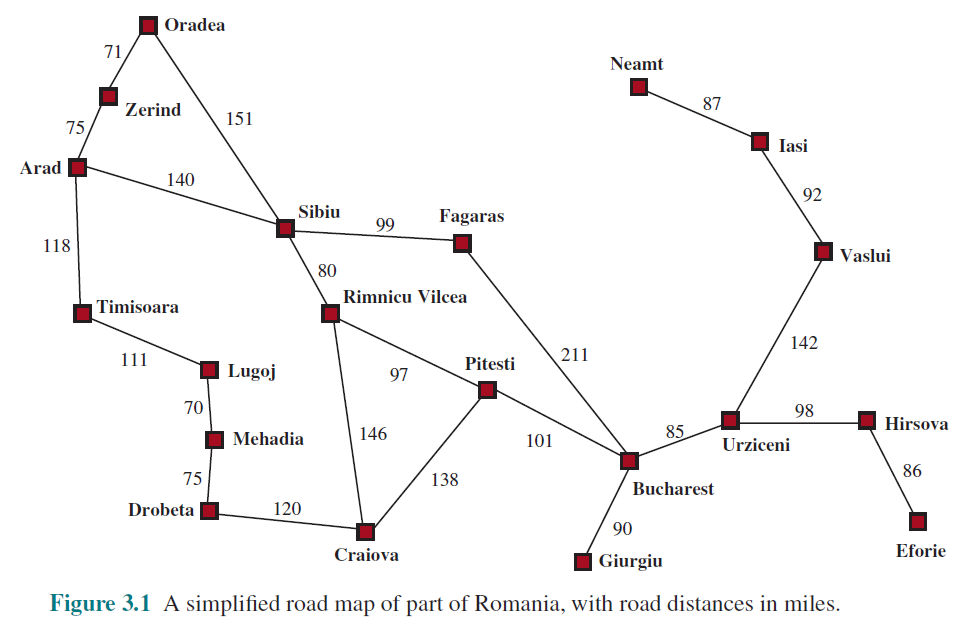

In [21]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

In [22]:
G = nx.Graph(romaniaMap.graph_dict)

In [23]:
G.nodes

NodeView(('Arad', 'Bucharest', 'Craiova', 'Drobeta', 'Eforie', 'Fagaras', 'Hirsova', 'Iasi', 'Lugoj', 'Oradea', 'Pitesti', 'Rimnicu', 'Urziceni', 'Zerind', 'Sibiu', 'Timisoara', 'Giurgiu', 'Mehadia', 'Vaslui', 'Neamt'))

In [24]:
nodes_colors= ['green' for node in romaniaMap.graph_dict.keys()]

In [25]:
# set the size of the plot
plt.figure(figsize=(18, 13))

<Figure size 1800x1300 with 0 Axes>

<Figure size 1800x1300 with 0 Axes>

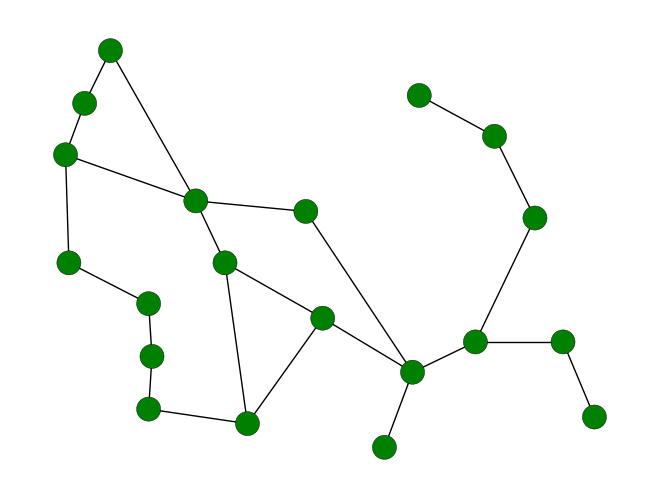

In [27]:
 #draw the graph (both nodes and edges) with locations from romania_locations
nx.draw(G, pos={k: romaniaMap.locations[k] for k in G.nodes()},
            node_color=nodes_colors, linewidths=0.3, edgecolors='k')

In [28]:
node_label_pos = { k:[v[0],v[1]-15]  for k,v in romaniaMap.locations.items() }

In [29]:
edge_weights = {(k, k2) : v2 for k, v in romaniaMap.graph_dict.items() for k2, v2 in v.items()}

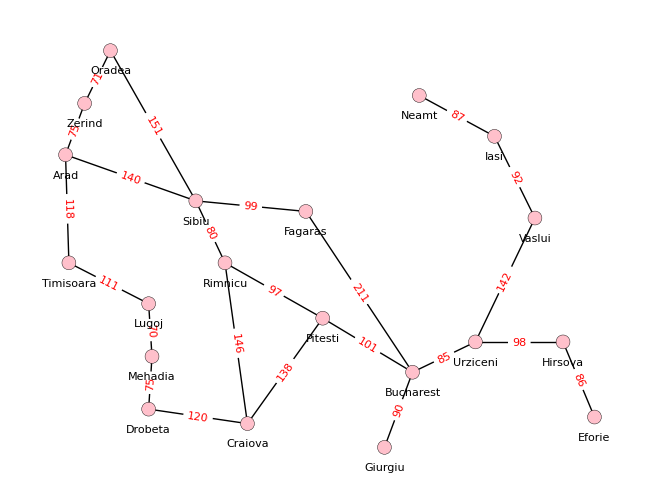

In [31]:
nx.draw(G, pos={k: romaniaMap.locations[k] for k in G.nodes()},
            node_color=['pink' for node in romaniaMap.graph_dict.keys()], linewidths=0.3, edgecolors='k', node_size=100)
# draw labels for nodes
node_label_handles = nx.draw_networkx_labels(G, pos=node_label_pos, font_size=8)
# add edge lables to the graph
nx.draw_networkx_edge_labels(G, pos=romaniaMap.locations, edge_labels=edge_weights, font_size=8, font_color
='r')
plt.show()

In a fully observable, deterministic, known environment, the solution to any problem is a fixed sequence of actions

If the model is correct, then once the agent has found a solution, it can ignore its percepts while it is executing the actions - because the solution
is guaranteed to lead to the goal - **Open-loop system**

8 possible states of the vacumm world

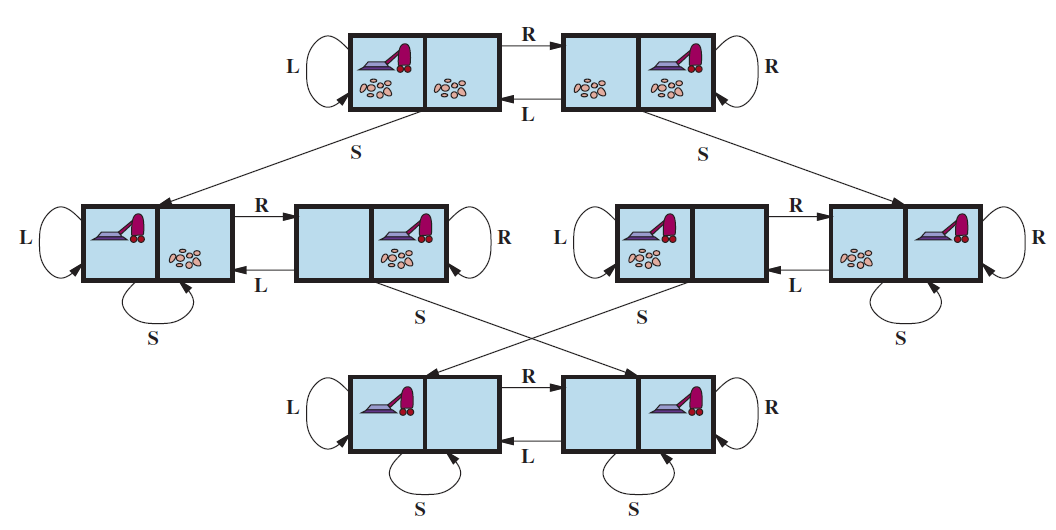


Each state is represented as:
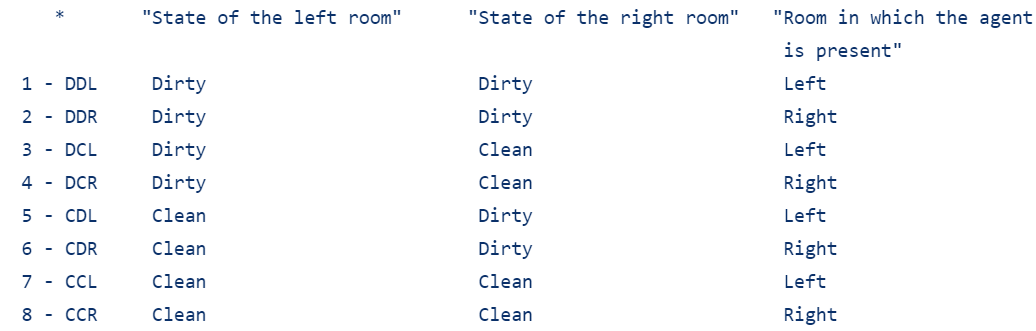

In [34]:
from vacuumWorldData import vacuumWorld

In [36]:
vacuumWorld

{'DDL': {'Suck': ('Clean', 'Dirty', 'Left'),
  'Left': ('Dirty', 'Dirty', 'Left'),
  'Right': ('Dirty', 'Dirty', 'Right')},
 'DDR': {'Suck': ('Dirty', 'Clean', 'Right'),
  'Left': ('Dirty', 'Dirty', 'Left'),
  'Right': ('Dirty', 'Dirty', 'Right')},
 'DCL': {'Suck': ('Clean', 'Clean', 'Left'),
  'Left': ('Dirty', 'Clean', 'Left'),
  'Right': ('Dirty', 'Clean', 'Right')},
 'DCR': {'Suck': ('Dirty', 'Clean', 'Right'),
  'Left': ('Dirty', 'Clean', 'Left'),
  'Right': ('Dirty', 'Clean', 'Right')},
 'CDL': {'Suck': ('Clean', 'Dirty', 'Left'),
  'Left': ('Clean', 'Dirty', 'Left'),
  'Right': ('Clean', 'Dirty', 'Right')},
 'CDR': {'Suck': ('Clean', 'Clean', 'Right'),
  'Left': ('Clean', 'Dirty', 'Left'),
  'Right': ('Clean', 'Dirty', 'Right')},
 'CCL': {'Suck': ('Clean', 'Clean', 'Left'),
  'Left': ('Clean', 'Clean', 'Left'),
  'Right': ('Clean', 'Clean', 'Right')},
 'CCR': {'Suck': ('Clean', 'Clean', 'Right'),
  'Left': ('Clean', 'Clean', 'Left'),
  'Right': ('Clean', 'Clean', 'Right')}}

In [37]:
vacuumWorldGraph=Graph(vacuumWorld)

In [38]:
vacuumWorldGraph.nodes()

['DCL',
 'CCL',
 'CCR',
 'CDR',
 'DCR',
 'DDR',
 'Right',
 'Suck',
 'CDL',
 'Left',
 'DDL']

In [39]:
from vacuumGraphClass import vacuumGraph

In [40]:
vacuumWorldGraph1=vacuumGraph(vacuumWorld)

In [42]:
vacuumWorldGraph1.nodes()

[('Dirty', 'Clean', 'Left'),
 'DCL',
 'CCL',
 'CCR',
 'CDR',
 'DCR',
 'DDR',
 'Right',
 ('Clean', 'Clean', 'Right'),
 'Suck',
 ('Clean', 'Dirty', 'Right'),
 'CDL',
 'Left',
 ('Dirty', 'Dirty', 'Right'),
 ('Clean', 'Dirty', 'Left'),
 ('Dirty', 'Clean', 'Right'),
 ('Clean', 'Clean', 'Left'),
 'DDL',
 ('Dirty', 'Dirty', 'Left')]

In [43]:
from vacuumWorldData import makeData, vacuumStatesLocations

In [44]:
makeData()#the state space

{('Dirty', 'Dirty', 'Left'): {'Suck': ('Clean', 'Dirty', 'Left'),
  'Left': ('Dirty', 'Dirty', 'Left'),
  'Right': ('Dirty', 'Dirty', 'Right')},
 ('Dirty', 'Dirty', 'Right'): {'Suck': ('Dirty', 'Clean', 'Right'),
  'Left': ('Dirty', 'Dirty', 'Left'),
  'Right': ('Dirty', 'Dirty', 'Right')},
 ('Dirty', 'Clean', 'Left'): {'Suck': ('Clean', 'Clean', 'Left'),
  'Left': ('Dirty', 'Clean', 'Left'),
  'Right': ('Dirty', 'Clean', 'Right')},
 ('Dirty', 'Clean', 'Right'): {'Suck': ('Dirty', 'Clean', 'Right'),
  'Left': ('Dirty', 'Clean', 'Left'),
  'Right': ('Dirty', 'Clean', 'Right')},
 ('Clean', 'Dirty', 'Left'): {'Suck': ('Clean', 'Dirty', 'Left'),
  'Left': ('Clean', 'Dirty', 'Left'),
  'Right': ('Clean', 'Dirty', 'Right')},
 ('Clean', 'Dirty', 'Right'): {'Suck': ('Clean', 'Clean', 'Right'),
  'Left': ('Clean', 'Dirty', 'Left'),
  'Right': ('Clean', 'Dirty', 'Right')},
 ('Clean', 'Clean', 'Left'): {'Suck': ('Clean', 'Clean', 'Left'),
  'Left': ('Clean', 'Clean', 'Left'),
  'Right': ('Clean',

In [45]:
from vacuumGraphClass import vacuumGraph

In [46]:
vacuumWorldGraph2=vacuumGraph(makeData(), vacuumStatesLocations())

In [47]:
vacuumWorldGraph2.g

{('Dirty', 'Dirty', 'Left'): {('Clean', 'Dirty', 'Left'): 1,
  ('Dirty', 'Dirty', 'Left'): 1,
  ('Dirty', 'Dirty', 'Right'): 1},
 ('Dirty', 'Dirty', 'Right'): {('Dirty', 'Clean', 'Right'): 1,
  ('Dirty', 'Dirty', 'Left'): 1,
  ('Dirty', 'Dirty', 'Right'): 1},
 ('Dirty', 'Clean', 'Left'): {('Clean', 'Clean', 'Left'): 1,
  ('Dirty', 'Clean', 'Left'): 1,
  ('Dirty', 'Clean', 'Right'): 1},
 ('Dirty', 'Clean', 'Right'): {('Dirty', 'Clean', 'Right'): 1,
  ('Dirty', 'Clean', 'Left'): 1},
 ('Clean', 'Dirty', 'Left'): {('Clean', 'Dirty', 'Left'): 1,
  ('Clean', 'Dirty', 'Right'): 1},
 ('Clean', 'Dirty', 'Right'): {('Clean', 'Clean', 'Right'): 1,
  ('Clean', 'Dirty', 'Left'): 1,
  ('Clean', 'Dirty', 'Right'): 1},
 ('Clean', 'Clean', 'Left'): {('Clean', 'Clean', 'Left'): 1,
  ('Clean', 'Clean', 'Right'): 1},
 ('Clean', 'Clean', 'Right'): {('Clean', 'Clean', 'Right'): 1,
  ('Clean', 'Clean', 'Left'): 1}}

In [48]:
vacuumWorldGraph2.nodes()

[('Dirty', 'Clean', 'Left'),
 ('Clean', 'Clean', 'Right'),
 ('Clean', 'Dirty', 'Right'),
 ('Dirty', 'Dirty', 'Right'),
 ('Clean', 'Dirty', 'Left'),
 ('Dirty', 'Clean', 'Right'),
 ('Clean', 'Clean', 'Left'),
 ('Dirty', 'Dirty', 'Left')]

In [49]:
vacuumWorldGraph2.get(('Clean', 'Dirty', 'Right'))

{('Clean', 'Clean', 'Right'): 1,
 ('Clean', 'Dirty', 'Left'): 1,
 ('Clean', 'Dirty', 'Right'): 1}

In [53]:
vacuumWorldGraph2.getLocation(('Clean', 'Dirty', 'Right'))

(9, 3)

In [54]:
G = nx.Graph(vacuumWorldGraph2.g)

In [55]:
node_label_pos = { k:[v[0],v[1]-0.5]  for k,v in vacuumWorldGraph2.locations.items() }

In [60]:
node_label_pos

{('Dirty', 'Dirty', 'Left'): [3, 7.5],
 ('Dirty', 'Dirty', 'Right'): [6, 4.5],
 ('Dirty', 'Clean', 'Left'): [0, 2.5],
 ('Dirty', 'Clean', 'Right'): [0, 7.5],
 ('Clean', 'Dirty', 'Left'): [1, 3.5],
 ('Clean', 'Dirty', 'Right'): [9, 2.5],
 ('Clean', 'Clean', 'Left'): [4, 4.5],
 ('Clean', 'Clean', 'Right'): [8, 4.5]}

In [61]:
edge_weights = {(k, v2) : k2 for k, v in vacuumWorldGraph2.graph_dict.items() for k2, v2 in v.items()}#actions

In [63]:
edge_weights

{(('Dirty', 'Dirty', 'Left'), ('Clean', 'Dirty', 'Left')): 'Suck',
 (('Dirty', 'Dirty', 'Left'), ('Dirty', 'Dirty', 'Left')): 'Left',
 (('Dirty', 'Dirty', 'Left'), ('Dirty', 'Dirty', 'Right')): 'Right',
 (('Dirty', 'Dirty', 'Right'), ('Dirty', 'Clean', 'Right')): 'Suck',
 (('Dirty', 'Dirty', 'Right'), ('Dirty', 'Dirty', 'Left')): 'Left',
 (('Dirty', 'Dirty', 'Right'), ('Dirty', 'Dirty', 'Right')): 'Right',
 (('Dirty', 'Clean', 'Left'), ('Clean', 'Clean', 'Left')): 'Suck',
 (('Dirty', 'Clean', 'Left'), ('Dirty', 'Clean', 'Left')): 'Left',
 (('Dirty', 'Clean', 'Left'), ('Dirty', 'Clean', 'Right')): 'Right',
 (('Dirty', 'Clean', 'Right'), ('Dirty', 'Clean', 'Right')): 'Right',
 (('Dirty', 'Clean', 'Right'), ('Dirty', 'Clean', 'Left')): 'Left',
 (('Clean', 'Dirty', 'Left'), ('Clean', 'Dirty', 'Left')): 'Left',
 (('Clean', 'Dirty', 'Left'), ('Clean', 'Dirty', 'Right')): 'Right',
 (('Clean', 'Dirty', 'Right'), ('Clean', 'Clean', 'Right')): 'Suck',
 (('Clean', 'Dirty', 'Right'), ('Clean', 'Di

In [64]:
sorted(G)#nodes labels on the G

[('Clean', 'Clean', 'Left'),
 ('Clean', 'Clean', 'Right'),
 ('Clean', 'Dirty', 'Left'),
 ('Clean', 'Dirty', 'Right'),
 ('Dirty', 'Clean', 'Left'),
 ('Dirty', 'Clean', 'Right'),
 ('Dirty', 'Dirty', 'Left'),
 ('Dirty', 'Dirty', 'Right')]

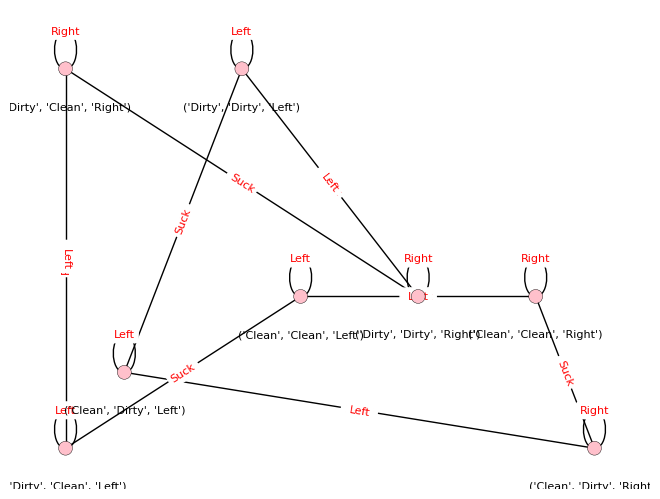

In [69]:
nx.draw(G, pos={k: vacuumWorldGraph2.locations[k] for k in G.nodes()},
            node_color=['pink' for node in vacuumWorldGraph2.g.keys()],
            linewidths=0.3, edgecolors='k', node_size=100)
# draw labels for nodes
node_label_handles = nx.draw_networkx_labels(G, pos=node_label_pos, font_size=8)
# add edge lables to the graph
nx.draw_networkx_edge_labels(G, pos=vacuumWorldGraph2.locations, edge_labels=edge_weights, font_size=8, font_color
='r')
plt.show()

In [70]:
from vacuumProblemClass import VacuumProblem

In [73]:
from vacuumWorldData import *

In [74]:
initState=DDL
initState

('Dirty', 'Dirty', 'Left')

In [75]:
goalState=[CCL,CCR]
goalState

[('Clean', 'Clean', 'Left'), ('Clean', 'Clean', 'Right')]

In [76]:
vp1=VacuumProblem(initState,goalState,vacuumWorldGraph2)

In [77]:
vp1.actions(DCR)

['Suck', 'Left', 'Right']

In [78]:
print(vp1.result(DCR, 'Suck'),vp1.result(DCR, 'Left'),vp1.result(DCR, 'Right'))

('Dirty', 'Clean', 'Right') ('Dirty', 'Clean', 'Left') ('Dirty', 'Clean', 'Right')


In [79]:
cost=0

In [80]:
vp1.path_cost(cost, DCR, 'Suck',DCR)

1

**Search Algorithms**

A search algorithm takes a search *problem* as *input* and returns a solution, or an indication of failure

We consider algorithms that superimpose a search *tree* over the statespace
graph, forming various paths from the initial state, trying to find a path that reaches a
goal state

Each **node** in the search tree *corresponds* to a *state* in the state space and the **edges** in the search tree correspond to *actions*.

The **root** of the tree corresponds to the *initial state* of the problem.

!!! It is important to understand the *distinction between the state space and the search tree*.

The state space describes the (possibly infinite) set of states in the world, and the actions that allow transitions from one state to another.

The search tree describes paths between
these states, reaching towards the goal

Search algorithms require a data structure to keep track of the search tree.

A **node** in the tree is represented by a data structure - *Node class*

In [81]:
from vacuumProblemSolvingAgentClass import VacuumProblemSolvingAgent

In [82]:
vpsa1=VacuumProblemSolvingAgent(initState,vacuumWorldGraph2,goalState)

In [83]:
vpsa1.update_state(vpsa1.state,DDR)

('Dirty', 'Dirty', 'Right')

In [84]:
vpsa1.state

('Dirty', 'Dirty', 'Left')

In [85]:
vp1.actions(DCR)

['Suck', 'Left', 'Right']

In [86]:
vpsa1.formulate_problem(vpsa1.state,vpsa1.goal).actions(DCR)

['Suck', 'Left', 'Right']

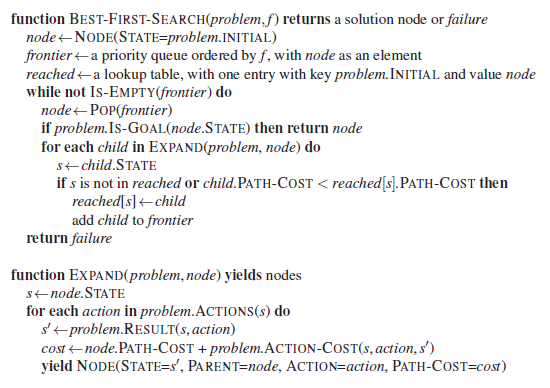

In [87]:
from agentsPrograms import BestFirstSearchAgentProgram

In [88]:
vp1

In [89]:
vp1.initial

('Dirty', 'Dirty', 'Left')

In [90]:
BFSAP1=BestFirstSearchAgentProgram()

In [91]:
seq=BFSAP1(vp1)

<Node ('Dirty', 'Dirty', 'Left')>
<Node ('Clean', 'Dirty', 'Left')>
<Node ('Clean', 'Dirty', 'Right')>
<Node ('Clean', 'Clean', 'Right')>


In [92]:
seq

<Node ('Clean', 'Clean', 'Right')>

In [93]:
seq.path()

[<Node ('Dirty', 'Dirty', 'Left')>,
 <Node ('Clean', 'Dirty', 'Left')>,
 <Node ('Clean', 'Dirty', 'Right')>,
 <Node ('Clean', 'Clean', 'Right')>]

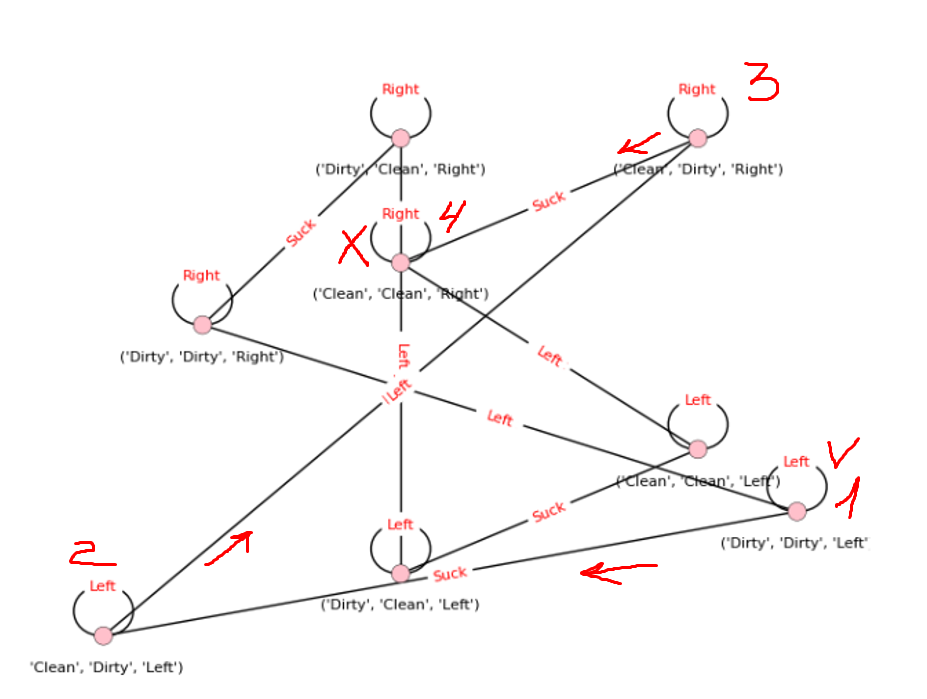

In [94]:
from vacuumWorldData import *

In [95]:
initState=CDL
initState

('Clean', 'Dirty', 'Left')

In [96]:
goalState=[CCL,CCR]
goalState

[('Clean', 'Clean', 'Left'), ('Clean', 'Clean', 'Right')]

In [97]:
from agents import ProblemSolvingVacuumAgentBFS

In [98]:
BFSagent1=ProblemSolvingVacuumAgentBFS(initState,vacuumWorldGraph2,goalState)

In [99]:
BFSagent1.seq

[]

In [100]:
BFSagent1.update_state(vpsa1.state,DDR)

('Dirty', 'Dirty', 'Right')

In [109]:
print(BFSagent1(CDR))

<Node ('Clean', 'Dirty', 'Right')>
<Node ('Clean', 'Clean', 'Right')>
Solution (a sequence of actions) from the initial state to a goal: ['Suck']
Suck


In [110]:
allNodeColors=[]
nSteps=0

In [111]:
initState

('Clean', 'Dirty', 'Left')

In [112]:
from agents import ProblemSolvingVacuumAgentBFSwithShow

In [113]:
BFSagent2=ProblemSolvingVacuumAgentBFSwithShow(initState,vacuumWorldGraph2,goalState)

Solution (a sequence of actions) from the initial state to a goal: ['Suck', 'Left', 'Suck']


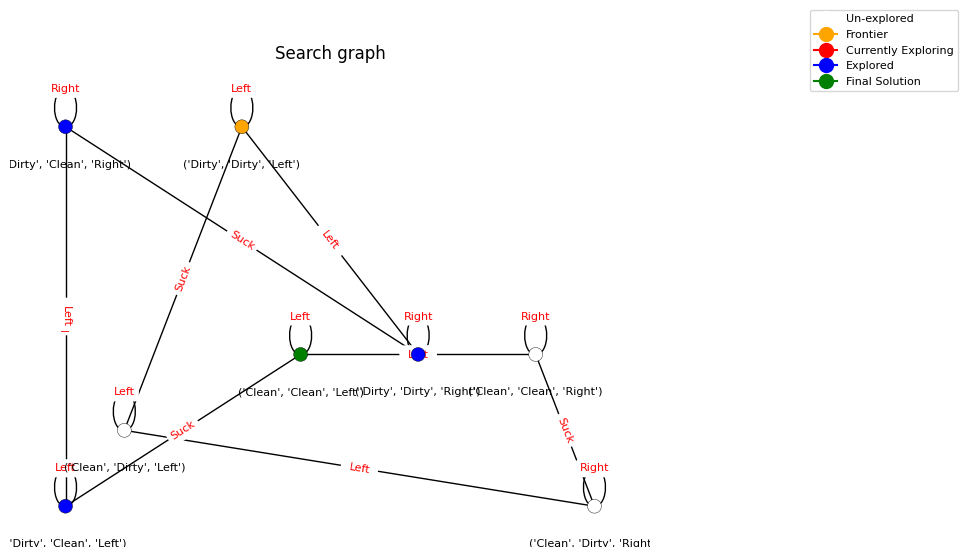

['Suck', 'Left', 'Suck']

In [114]:
BFSagent2.work(DDR)

**Tasks:**

***Task 1: The wolf, the goat and the cabbage puzzle***

A farmer with his wolf, goat, and cabbage come to the edge of a river they wish to cross.
There is a boat at the river's edge, but, of course, only the farmer can row. The boat also can
carry only two things (including the rower) at a time. If the wolf is ever left alone with the
goat, the wolf will eat the goat; similarly, if the goat is left alone with the cabbage, the goat
will eat the cabbage.
1. Design the complete state space representation
2. Design and implement the Agent to find a sequence of crossings of the river so that all 4 characters arrive safely on the other side of the river.
3. Visualize the search tree to show the following types of nodes:unexplored, expanded, onTheFrontier,goal


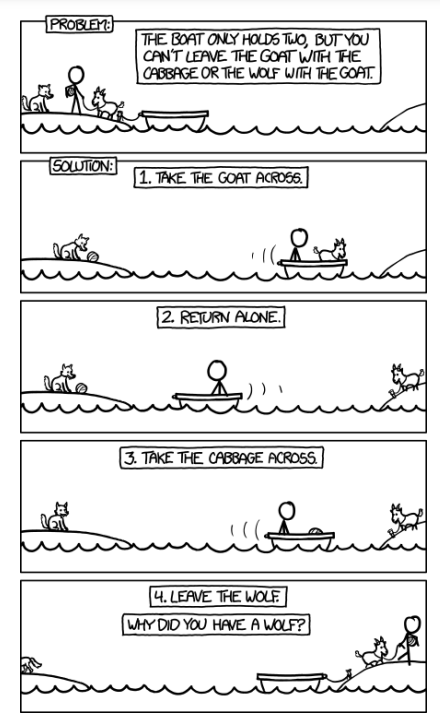

States:
* Location of a wolf, a goat, a cabbage (left bank,
boat, right bank) and a farmer with a boat (left, right)

Initial state:
* (left, left, left, left)

Actions:
* Boat left, boat right
* Load wolf, unload wolf
* Load goat, unload goat
* Load cabbage, unload cabbage

!!! never leaving wolf with goat, goat with cabbage alone)
* Goal:(right, right, right, right)
* Cost: 1 per action

***Task 2: Treasure Maze***

1. Model a **Maze Problem** by having a node for a starting point, a finishing point, dead ends, and all the points in the maze where more than one path can be taken (or the Agent should turn around), and then connecting the vertices according to the paths in the maze

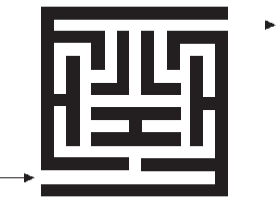

2. There are 3 kind of treasures in the Maze:
* pile of gold
* diamond
* flyer for 100 free pizzas

Treasures are located randomly in the maze, but not at the starting or ending point. Also, two treasures cannot be located at the same point.

3. Initially the Agent's performace is 50% of the number of nodes. One executed action is -1 from performace

4. Agent's actions: *advance, left, right*

5. The agent must grab one treasure. Then redefine its goal to find the exit.

6. Visualize the 2 search trees:
* for the 1st part of solution (with a tresure as a goal)
* for the 2nd part of solution (from the location of the captured treasure to the exit)